In [1]:
#ข้อ1 ดาวน์โหลด datasets ชื่อ credit-g
from sklearn.datasets import fetch_openml
credit = fetch_openml('credit-g')

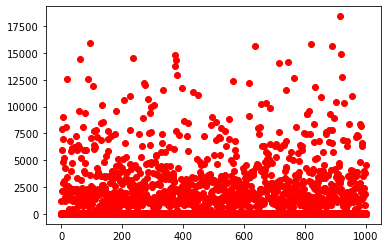

In [2]:
#ข้อ2 visualize การกระจายตัวของข้อมูล continuous features และการกระจายตัวของข้อมูลที่เป็น target
# visualize ข้อมูล continuous features 
import matplotlib.pyplot as plt
plt.plot(credit.data,'ro')
plt.show()

[Text(0.5, 0, 'class')]

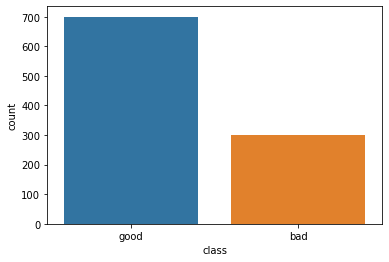

In [3]:
#visualize ข้อมูล target
import seaborn as sns
ax = sns.countplot(x="target", data=credit)
ax.set(xlabel="class")

In [4]:
#ข้อ3 แบ่งข้อมูลออกเป็น training และtesting set  ให้ทำ preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

#preprocessing ข้อมูล categorical ด้วย LabelEncoder
le = LabelEncoder()
y = credit.target
y = le.fit_transform(y)
X = credit.data

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))

Training set score: 0.771


In [5]:
# ข้อ4
# สร้างโมเดลด้วย Logistic Regression, Linear support vector machinesและk-nearest neighbors และประเมินผล
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Logistic regression model
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
print("Logistic Regression Training set score: {:.3f}".format(lr.score(X_train, y_train)))
print("Logistic Regression Test set score: {:.3f}\n".format(lr.score(X_test, y_test)))

#Linear support vector machines
svm = SVC().fit(X_train, y_train)
print("Support vector machines Training set score: {:.3f}".format(svm.score(X_train, y_train)))
print("Support vector machines Test set score: {:.3f}\n".format(svm.score(X_test, y_test)))

#k-nearest neighbors
knn = KNeighborsClassifier().fit(X_train, y_train)
print("k-nearest neighbors Training set score: {:.3f}".format(knn.score(X_train, y_train)))
print("k-nearest neighbors Test set score: {:.3f}\n".format(knn.score(X_test, y_test)))

'''
Answer : Logistic regression model มีค่า training และ test score สูงกว่าอีก2โมเดล ทั้งที่ยังไม่ได้ปรับ
ค่า parameters ใดๆ เพราะงั้นแสดงว่าข้อมูล datasets ชุดนี้เหมาะที่จะทำโมเดล Logistic Regression
'''

Logistic Regression Training set score: 0.771
Logistic Regression Test set score: 0.750

Support vector machines Training set score: 1.000
Support vector machines Test set score: 0.700

k-nearest neighbors Training set score: 0.759
k-nearest neighbors Test set score: 0.660



'\nAnswer : Logistic regression model มีค่า training และ test score สูงกว่าอีก2โมเดล ทั้งที่ยังไม่ได้ปรับ\nค่า parameters ใดๆ เพราะงั้นแสดงว่าข้อมูล datasets ชุดนี้เหมาะที่จะทำโมเดล Logistic Regression\n'

In [6]:
#วิเคราะห์ว่าการแปลง scale ข้อมูลที่เป็น continuous features ด้วย StandardScaler มีผลต่อผลลัพธ์หรือไม่อย่างไร
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("After preprocessing train data with StandardScaler\n")

#Logistic regression model
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
print("Logistic Regression Training set score: {:.3f}".format(lr.score(X_train, y_train)))
print("Logistic Regression Test set score: {:.3f}\n".format(lr.score(X_test, y_test)))

#Linear support vector machines
svm = SVC().fit(X_train, y_train)
print("Support vector machines Training set score: {:.3f}".format(svm.score(X_train, y_train)))
print("Support vector machines Test set score: {:.3f}\n".format(svm.score(X_test, y_test)))

#k-nearest neighbors
knn = KNeighborsClassifier().fit(X_train, y_train)
print("k-nearest neighbors Training set score: {:.3f}".format(knn.score(X_train, y_train)))
print("k-nearest neighbors Test set score: {:.3f}\n".format(knn.score(X_test, y_test)))

'''
Answers: ค่า training และ test score ของทั้งสามโมเดลมีค่าเพิ่มขึ้นหลังจากการทำ preprocessing ด้วย
StandardScaler กับข้อมูล continuous features เนื่องมาจากการทำ scaler จะทำการสเกลข้อมูลให้อยู่ใน range ที่ใกล้เคียงกัน
เพื่อให้ผลลัพธ์ในการ predict และ score มีความแม่นยำมากขึ้น
'''

After preprocessing train data with StandardScaler

Logistic Regression Training set score: 0.781
Logistic Regression Test set score: 0.750

Support vector machines Training set score: 0.855
Support vector machines Test set score: 0.740

k-nearest neighbors Training set score: 0.820
k-nearest neighbors Test set score: 0.695



'\nAnswers: ค่า training และ test score ของทั้งสามโมเดลมีค่าเพิ่มขึ้นหลังจากการทำ preprocessing ด้วย\nStandardScaler กับข้อมูล continuous features เนื่องมาจากการทำ scaler จะทำการสเกลข้อมูลให้อยู่ใน range ที่ใกล้เคียงกัน\nเพื่อให้ผลลัพธ์ในการ predict และ score มีความแม่นยำมากขึ้น\n'

In [7]:
#ข้อ5 ปรับค่า parameters ด้วยการใช้GridSearchCV แล้วดูว่าผลลัพธ์ดีขึ้นหรือไม่ 
#ประเมินผลด้วยข้อมูล test set แสดงประสิทธิภาพของฟังก์ชันด้วยการกราฟเปรียบเทียบของทั้งสามโมเดล
from sklearn.model_selection import GridSearchCV
import warnings
import numpy as np
#Logistic Regression
C = np.logspace(0, 4, 10)
hyperparameters = {'C': C, 'penalty': ['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(), hyperparameters)
best_model = clf.fit(X_train, y_train)
C_value = best_model.best_estimator_.get_params()['C']
pen_value = best_model.best_estimator_.get_params()['penalty']

lr = LogisticRegression(C=C_value, penalty=pen_value, max_iter=1000).fit(X_train, y_train)

In [8]:
#evaluate Logistic Regression by test score
print("Logistic Regression C= {0:.3f} test score: {1:.3f}\n".format(C_value,lr.score(X_test, y_test)))

Logistic Regression C= 1.000 test score: 0.755



In [9]:
#Linear support vector machines
param_grid = {'C': [0.1,1, 10, 100, 1000]}
grid = GridSearchCV(SVC(),param_grid)
best_model = grid.fit(X_train, y_train)
C_value = best_model.best_estimator_.get_params()['C']


#evaluate Linear SVM by test score
svm = SVC(C=C_value).fit(X_train, y_train)
print("Linear SVM C= {0:.3f} test score: {1:.3f}".format(C_value, svm.score(X_test, y_test)))

Linear SVM C= 1.000 test score: 0.740


In [10]:
#k-nearest neighbors
find = np.arange(1,100,2)
grid_params = {'n_neighbors': find}
gs = GridSearchCV(KNeighborsClassifier(), grid_params)
gs_results = gs.fit(X_train, y_train)
n_neighbors = gs_results.best_estimator_.get_params()['n_neighbors']

#evaluate k-nearest neighbors by test score
knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
print("KNN n_neighbors= {0:.3f} test score: {1:.3f}\n".format(n_neighbors, knn.score(X_test, y_test)))

KNN n_neighbors= 17.000 test score: 0.720



In [11]:
#ข้อ6  ให้แสดงรูปของค่าcoefficients20 ตัวทีสําคัญทีสุดของLogisticRegressionและ
#Linear SVM ที่ใช้ค่าhyper-parameters ที่ดีที่สุดที่ได้จากการทํา grid search

  